https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
#  Random Forest Classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
%matplotlib inline


## IMPORTING ALL THE IMPORTANT LIBRARIES

In [72]:
df=pd.read_csv('heart.csv')
df.head()

# READING THE DATA FILE AND DISPLAYING ITS TOP OBSERVATIONS

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
X=df.drop(columns=['target']) #  GETTING DEPENDENT AND INDEPENDENT VARIABLES
y=df['target']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)  

## SPLITING INTO TRAIN AND TEST DATASET

In [75]:
clf = RandomForestClassifier(random_state=0) ## instantiating the random_forest

In [76]:
clf.fit(X_train,y_train) ## fitting the data

RandomForestClassifier(random_state=0)

In [77]:
y_pred=clf.predict(X_test) ## predicting the classes

In [78]:
confusion_matrix(y_test,y_pred) ##  confusion matrix

array([[19,  8],
       [ 4, 30]], dtype=int64)

In [81]:
accuracy_score(y_test,y_pred)

0.8032786885245902

In [82]:
print(classification_report(y_test,y_pred)) ## classification report

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.79      0.88      0.83        34

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [83]:
probs=clf.predict_proba(X_test) ## predicting probabilities

In [19]:
fpr, tpr, thresh1 = roc_curve(y_test, probs[:,1], pos_label=1) ## getting true positive and false positive rate

In [84]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)  ## getting tpr and fpr for staraing line

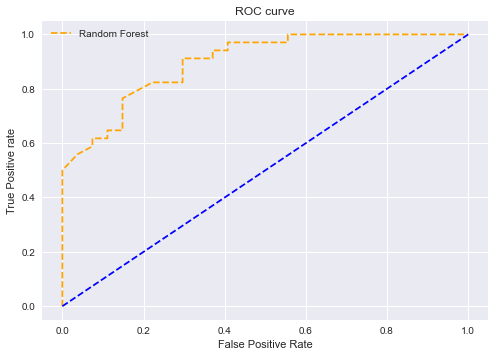

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [86]:
roc_auc_score(y_test,y_pred)  ## area under the curve

0.7930283224400871